In [ ]:
!pip install sentence-transformers torch pandas scikit-learn


In [ ]:
!pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer, InputExample, losses
from torch.utils.data import DataLoader
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import torch


/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [ ]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Data Preprocessing

In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer, InputExample, losses
from torch.utils.data import DataLoader
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import torch

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

data = pd.read_csv('/content/Job Dataset.csv',encoding='ISO-8859-1')
train_examples = []
unique_skills = set()

# Preprocessing function
def preprocess_data(data):
    data = data.dropna(subset=['Job Title', 'Job Skills'])
    data['Job Title'] = data['Job Title'].str.lower()
    data['Job Skills'] = data['Job Skills'].str.lower()
    data['skills_list'] = data['Job Skills'].apply(lambda x: x.split(","))

    for _, row in data.iterrows():
        job_title = row['Job Title']
        for skill in row['skills_list']:
            skill = skill.strip()
            train_examples.append(InputExample(texts=[job_title, skill], label=1))
            unique_skills.add(skill)

        unused_skills = list(unique_skills - set(row['skills_list']))
        if unused_skills:
            for _ in range(len(row['skills_list'])):
                random_skill = np.random.choice(unused_skills)
                train_examples.append(InputExample(texts=[job_title, random_skill], label=0))

preprocess_data(data)









<ipython-input-6-63ed35979a22>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Job Title'] = data['Job Title'].str.lower()
<ipython-input-6-63ed35979a22>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Job Skills'] = data['Job Skills'].str.lower()
<ipython-input-6-63ed35979a22>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

Visualization Dependencies

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

1. Job Title Frequency

<ipython-input-54-982de1ca7061>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_job_titles.index, x=top_job_titles.values, palette="viridis")


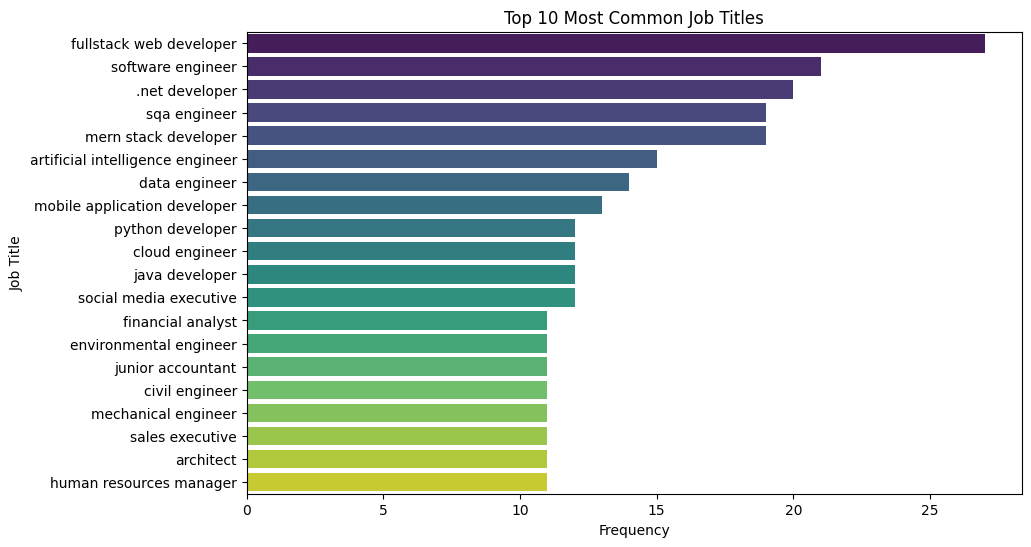

In [54]:
# 1. Job Title Frequency
plt.figure(figsize=(10, 6))
top_job_titles = data['Job Title'].value_counts().nlargest(20)  # Top 20 job titles
sns.barplot(y=top_job_titles.index, x=top_job_titles.values, palette="viridis")
plt.title("Top 10 Most Common Job Titles")
plt.xlabel("Frequency")
plt.ylabel("Job Title")
plt.show()

2. Skill Frequency

<ipython-input-56-edd7558b09f6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=[skill[0] for skill in top_skills], x=[skill[1] for skill in top_skills], palette="inferno")


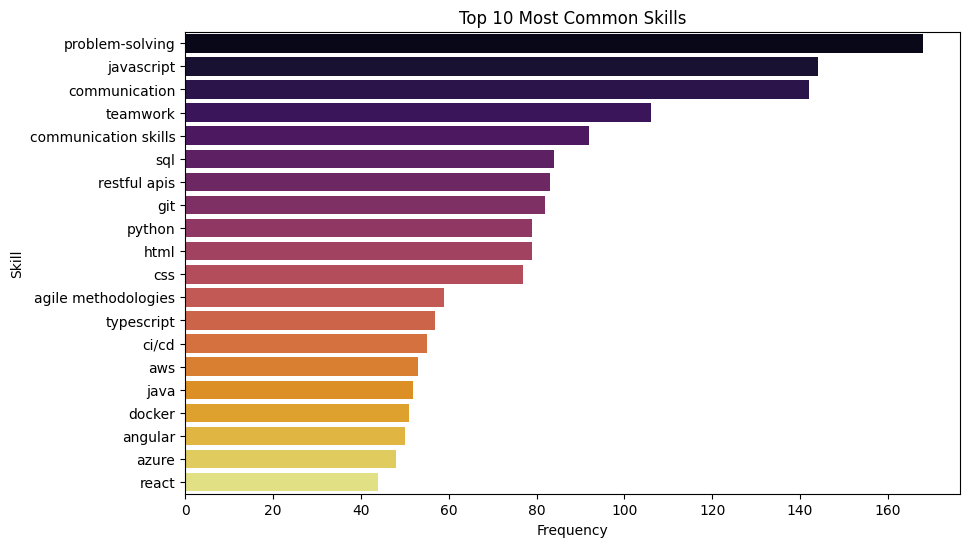

In [56]:
# 2. Skills Frequency
all_skills = [skill for sublist in data['skills_list'] for skill in sublist]
skills_counts = Counter(all_skills)
top_skills = skills_counts.most_common(20)  # Top 20 skills

plt.figure(figsize=(10, 6))
sns.barplot(y=[skill[0] for skill in top_skills], x=[skill[1] for skill in top_skills], palette="inferno")
plt.title("Top 10 Most Common Skills")
plt.xlabel("Frequency")
plt.ylabel("Skill")
plt.show()

3. Unique Skills per Job Title

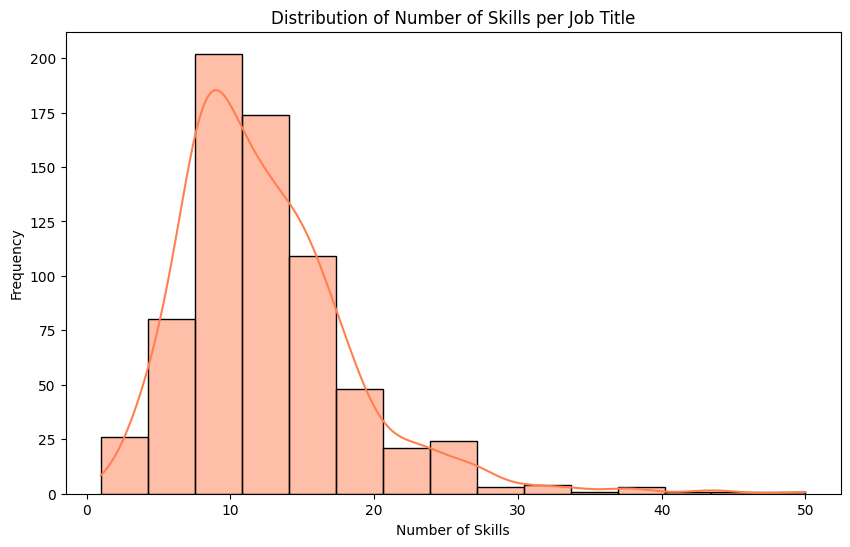

In [57]:
# 3. Unique Skills per Job Title
skills_per_job_title = data['skills_list'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(skills_per_job_title, bins=15, kde=True, color="coral")
plt.title("Distribution of Number of Skills per Job Title")
plt.xlabel("Number of Skills")
plt.ylabel("Frequency")
plt.show()


Loaders and Loss functions

In [ ]:
# Define DataLoader and Loss
train_dataloader = DataLoader(train_examples, shuffle=True, batch_size=8)
train_loss = losses.CosineSimilarityLoss(model)

Params

In [ ]:
# Training parameters
epochs = 4
patience = 1
min_delta = 1e-4
best_loss = float('inf')
no_improvement_epochs = 0

Training Loop

In [ ]:
# Training loop
for epoch in range(epochs):
    model.fit(train_objectives=[(train_dataloader, train_loss)],
              epochs=1,
              warmup_steps=100,
              weight_decay=0.01,
              show_progress_bar=True)

    # Calculate validation loss
    model.eval()

# Encode unique skills
skill_embeddings = model.encode(list(unique_skills), convert_to_tensor=True)

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Step,Training Loss
500,0.211200
1000,0.185500
1500,0.177300
2000,0.174200


Step,Training Loss
500,0.157100
1000,0.164000
1500,0.160100
2000,0.152600


Step,Training Loss
500,0.112500
1000,0.128300
1500,0.136200
2000,0.141400


Step,Training Loss
500,0.075900
1000,0.094000
1500,0.111900
2000,0.132000


In [48]:
evaluation=model.eval()

MANUALLY ADDING THE LOSS VALUES (BECOZ I AM TOO LAZY TO RE-RUN)

In [61]:
import matplotlib.pyplot as plt

epochs = 4
steps = [500, 1000, 1500, 2000]

loss_values = {
    1: [0.2112, 0.1855, 0.1773, 0.1742],
    2: [0.1571, 0.1640, 0.1601, 0.1526],
    3: [0.1125, 0.1283, 0.1362, 0.1414],
    4: [0.0759, 0.0940, 0.1119, 0.1320]
}

FLATTEN AND CALCULATE MEAN LOSS PER EPOCH

In [62]:
all_step_losses = [loss for epoch_losses in loss_values.values() for loss in epoch_losses]
epoch_losses = [sum(loss_values[epoch]) / len(loss_values[epoch]) for epoch in loss_values]


LOSS OVER STEPS

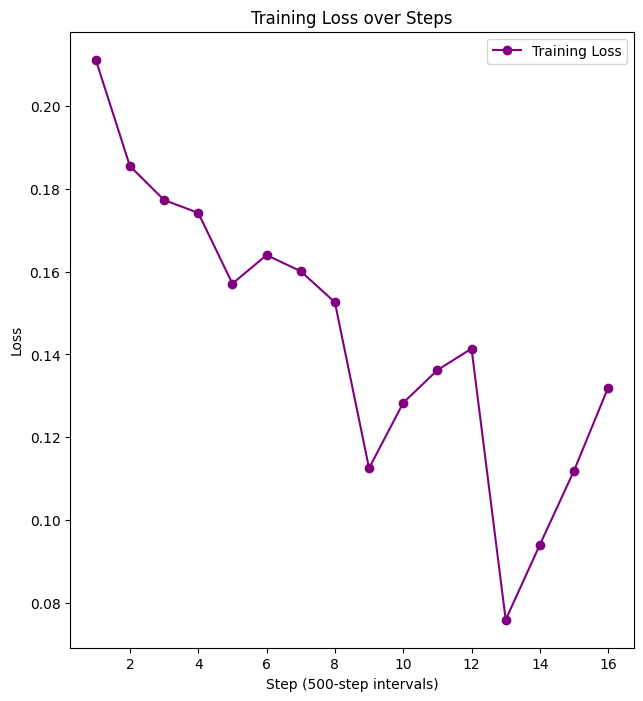

In [68]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(all_step_losses) + 1), all_step_losses, label="Training Loss", color="purple", marker="o")
plt.xlabel("Step (500-step intervals)")
plt.ylabel("Loss")
plt.title("Training Loss over Steps")
plt.legend()

MEAN TRAINING LOSS OVER EPOCHS


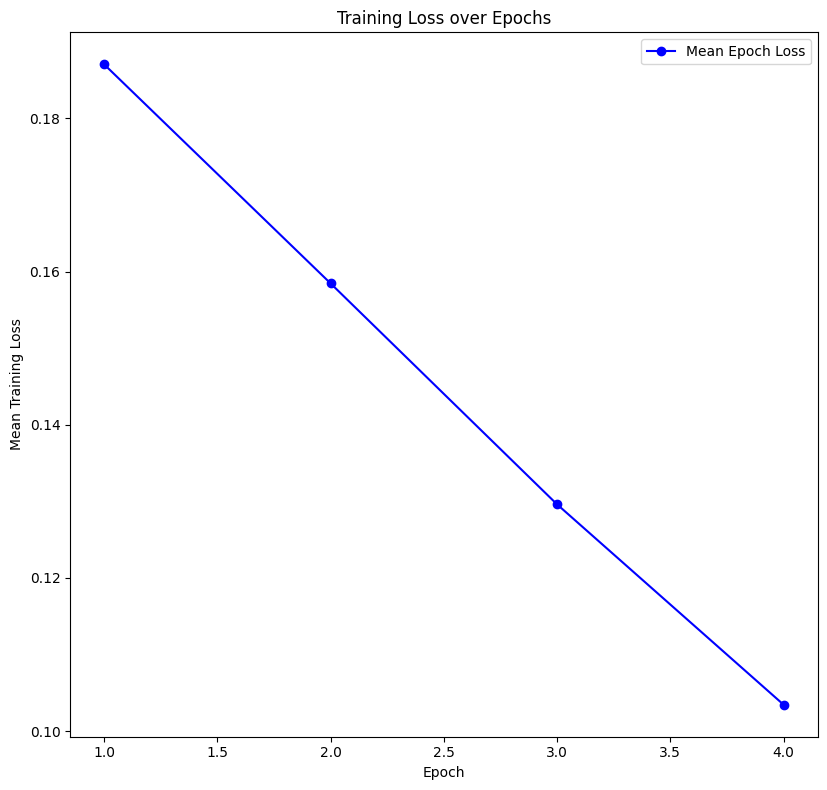

In [69]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), epoch_losses, label="Mean Epoch Loss", color="blue", marker="o")
plt.xlabel("Epoch")
plt.ylabel("Mean Training Loss")
plt.title("Training Loss over Epochs")
plt.legend()

plt.tight_layout()
plt.show()

Predict Skills Function (initial)

In [ ]:
# Skill prediction function
def predict_skills(job_title, top_n=10):
    job_embedding = model.encode(job_title, convert_to_tensor=True).cpu(),
    similarities = cosine_similarity(job_embedding.unsqueeze(0).detach().numpy(), skill_embeddings.detach().numpy())
    top_indices = np.argsort(similarities[0])[::-1][:top_n]
    top_skills = [list(unique_skills)[i] for i in top_indices]
    return ', '.join(top_skills)

new_job_title = "Web developer"
predicted_skills = predict_skills(new_job_title)
print(f"Predicted skills for '{new_job_title}': {predicted_skills}")

Predicted skills for 'Web developer': html, angular, web apis, performance optimization, restful api, web api, css, rest api, html5, boilerplate


Post processed


In [ ]:
import re

def predict_skills(job_title, top_n=20):
    job_embedding = model.encode(job_title, convert_to_tensor=True)
    similarities = cosine_similarity(job_embedding.unsqueeze(0).detach().numpy(), skill_embeddings.detach().numpy())
    top_indices = np.argsort(similarities[0])[::-1][:top_n]
    # Remove unwanted characters and join the skills
    top_skills = [re.sub(r"[^\w\s]", "", list(unique_skills)[i].strip()) for i in top_indices]
    return ', '.join(top_skills)

new_job_title = "Web developer"
predicted_skills = predict_skills(new_job_title)
print(f"Predicted skills for '{new_job_title}': {predicted_skills}")


Predicted skills for 'Web developer': html, angular, web apis, performance optimization, restful api, web api, css, rest api, html5, boilerplate, microservices, javascript, json, typescript, apex, nodejs, angularjs, nodejs, react, web development


Test Titles

In [ ]:
new_job_title = "content writer"
predicted_skills = predict_skills(new_job_title)
print(f"Predicted skills for '{new_job_title}': {predicted_skills}")

Predicted skills for 'content writer': content writing, content publishing, content editing, blog writing, marketing copywriting, content management systems, content strategy, content management, social media engagement, copywriting


In [ ]:
new_job_title = "social media manager"
predicted_skills = predict_skills(new_job_title)
print(f"Predicted skills for '{new_job_title}': {predicted_skills}")

Predicted skills for 'social media manager': social media promotion, social media advertising, social media engagement, social media strategy, social media management, social media platforms, digital advertising, social media marketing, community engagement, media strategy development


Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


saving model and skill embeddings

In [ ]:

model.save('/content/drive/MyDrive/job_skills_model')
torch.save(skill_embeddings, '/content/drive/MyDrive/skill_embeddings.pt')
unique_skills = list(unique_skills)

with open('/content/drive/MyDrive/unique_skills.txt', 'w') as f:
    for skill in unique_skills:
        f.write(f"{skill}\n")


Computing widget examples:   0%|          | 0/1 [00:00<?, ?example/s]

Loading model and embeddings to use

In [ ]:
from sentence_transformers import SentenceTransformer
import torch
import re
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


model = SentenceTransformer('/content/drive/MyDrive/job_skills_model')
skill_embeddings = torch.load('/content/drive/MyDrive/skill_embeddings.pt')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-21-022fc79cabc2>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  skill_embeddings = torch.load('/content/drive/MyDrive/skill_embeddings.pt')


In [ ]:
# Load unique skills
with open('/content/drive/MyDrive/unique_skills.txt', 'r') as f:
    unique_skills = [line.strip() for line in f]

same function

In [ ]:
def predict_skills(job_title, top_n=20):
    job_embedding = model.encode(job_title, convert_to_tensor=True)
    similarities = cosine_similarity(job_embedding.unsqueeze(0).detach().numpy(), skill_embeddings.detach().numpy())
    top_indices = np.argsort(similarities[0])[::-1][:top_n]
    top_skills = [re.sub(r"[^\w\s]", "", unique_skills[i].strip()) for i in top_indices]
    return ', '.join(top_skills)


Input Test

FRONTEND DEVELOPER (WITHOUT NORMALIZATION)


In [ ]:
job_title = input("Enter job title: ")
predicted_skills = predict_skills(job_title)
print(f"Predicted skills for '{job_title}': {predicted_skills}")

Enter job title: frontend developer
Predicted skills for 'frontend developer': reactjs, web3js, react js, redux, reactjs, javascript frameworks, vuejs, angularjs, chartjs, webpack, nestjs, expressjs, restful api development, react, nextjs, angularjs, vue, mvc, reduxjs, css3


FRONTEND DEVELOPER (AFTER NORMALIZATION)

In [ ]:
job_title = input("Enter job title: ")
predicted_skills = predict_skills(job_title)
print(f"Predicted skills for '{job_title}': {predicted_skills}")

Enter job title: frontend developer
Predicted skills for 'frontend developer': reactjs, web3js, redux, javascript frameworks, vuejs, angularjs, chartjs, webpack, nestjs, expressjs, restful api development, nextjs, mvc, css3, backend development, html, htmlcss, redux saga, mongoose, crossplatform development


CONTENT CREATOR

In [ ]:
job_title = input("Enter job title: ")
predicted_skills = predict_skills(job_title)
print(f"Predicted skills for '{job_title}': {predicted_skills}")

Enter job title: content creator
Predicted skills for 'content creator': content creation, content generation, content development, content strategy, userfriendly content creation, content marketing, content planning, social media platforms, content optimization, instagram, content evaluation, social media strategy, social media marketing, content management systems, campaign optimization, facebook, video content creation, social media strategy development, media creation, content management


MARKETING MANAGER

In [ ]:
job_title = input("Enter job title: ")
predicted_skills = predict_skills(job_title)
print(f"Predicted skills for '{job_title}': {predicted_skills}")

Enter job title: marketing manager
Predicted skills for 'marketing manager': marketing, marketing management, influencer collaboration, digital advertising, strategic marketing, paid advertising management, influencer engagement, social media promotion, sales tools, promotional campaign, performance marketing, competitor analysis, market analysis, customer engagement, campaign management, engagement analysis, marketing copywriting, market research, buyer persona research, search engine marketing


ELECTRICAL ENGINEER

In [ ]:
job_title = input("Enter job title: ")
predicted_skills = predict_skills(job_title)
print(f"Predicted skills for '{job_title}': {predicted_skills}")

Enter job title: Electrical engineer
Predicted skills for 'Electrical engineer': electrical instruments, electrical engineering leadership, electrical systems, electrical standards knowledge, electrical instrumentation parts, hvac systems, electrical knowledge, domestic electrical systems, electrical maintenance, electrical system design, electrical codes knowledge, electrical circuit blueprints, electrical design software proficiency, standard electrical system drawings, electrical regulations knowledge, electrical equipment specifications, electrical code knowledge, electrical systems design, control systems, metering equipment


SOFTWARE ENGINEER

In [ ]:
job_title = input("Enter job title: ")
predicted_skills = predict_skills(job_title)
print(f"Predicted skills for '{job_title}': {predicted_skills}")

Enter job title: Software Engineer
Predicted skills for 'Software Engineer': software engineer, sql, data structures, java, machine learning, c, pair programming, enm, apex, cicd pipelines, collaboration with development teams, python, technical skills, python development, etl, communication, problemsolving, integration strategies, persistence, teamwork


DATA SCIENTIST

In [73]:
job_title = input("Enter job title: ")
predicted_skills = predict_skills(job_title)
print(f"Predicted skills for '{job_title}': {predicted_skills}")


Enter job title: data scientist
Predicted skills for 'data scientist': data models, r, r programming, data modeling, statistical modeling, model training, data accuracy, data visualization, data mining, neural networks, data processing, data presentation, data accuracy verification, statistical software, analytic skills, data compilation, statistical methods, keras, tensorflow, ml


ATTEMPT TO REMOVE SIMILAR SKILLS


NORMALIZED

In [ ]:
import re
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def normalize_skill(skill):
    # Standardize skill names to lowercase and remove extra spaces
    skill = skill.lower().strip()
    # Remove variations of "js" like "JS" or "js" for consistency
    skill = skill.replace(" js", "").replace("js", "")
    skill = skill.replace(",", "").replace("-", "").replace(".", "").replace(" ", "")
    return skill

def predict_skills(job_title, top_n=20):
    job_embedding = model.encode(job_title, convert_to_tensor=True)
    similarities = cosine_similarity(job_embedding.unsqueeze(0).detach().numpy(), skill_embeddings.detach().numpy())
    top_indices = np.argsort(similarities[0])[::-1]  # Sort indices by similarity in descending order

    seen_skills = {}
    top_skills = []

    for i in top_indices:
        raw_skill = unique_skills[i].strip()
        normalized_skill = normalize_skill(raw_skill)  # Normalize skill

        # Only add the skill if it's not a duplicate based on the normalized name
        if normalized_skill not in seen_skills:
            seen_skills[normalized_skill] = raw_skill  # Store the original name
            top_skills.append(raw_skill)

        if len(top_skills) == top_n:  # Stop once we have the desired number of unique skills
            break

    # Post-processing to remove non-alphanumeric characters from the skill list
    top_skills = [re.sub(r"[^\w\s]", "", unique_skills[i].strip()) for i in top_indices if unique_skills[i] in top_skills]

    return ', '.join(top_skills)


OUTPUT VISUALIZATIONS


In [80]:
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

def visualize_similarity(job_title, top_n=20, plot_type="heatmap"):
    # Get top skills and their cosine similarities using the existing predict_skills function
    top_skills = predict_skills(job_title, top_n).split(', ')  # Get top skills as a list
    job_embedding = model.encode(job_title, convert_to_tensor=True)
    similarities = cosine_similarity(job_embedding.unsqueeze(0).detach().numpy(), skill_embeddings.detach().numpy())

    # Sort top_n similarities
    top_indices = np.argsort(similarities[0])[::-1][:top_n]
    top_similarities = [similarities[0][i] for i in top_indices]

    # Visualize cosine similarity using heatmap or bar graph based on plot_type
    if plot_type == "heatmap":
        # Create a heatmap of cosine similarities between the job title and top skills
        data = np.array([top_similarities]).T  # Convert to column vector for the heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(data, annot=True, xticklabels=[job_title], yticklabels=top_skills, cmap="YlGnBu", cbar=True)
        plt.title(f'Cosine Similarity Heatmap for Job Title: {job_title}')
        plt.xlabel('Job Title')
        plt.ylabel('Top Predicted Skills')
        plt.show()

    elif plot_type == "bar":
        # Create a bar graph for cosine similarities
        plt.figure(figsize=(10, 6))
        plt.barh(top_skills[::-1], top_similarities[::-1], color='skyblue')
        plt.xlabel('Cosine Similarity')
        plt.title(f'Cosine Similarity of Top {top_n} Skills for Job Title: {job_title}')
        plt.gca().invert_yaxis()  # Invert y-axis to have the highest similarity at the top
        plt.show()


DATA SCIENTIST

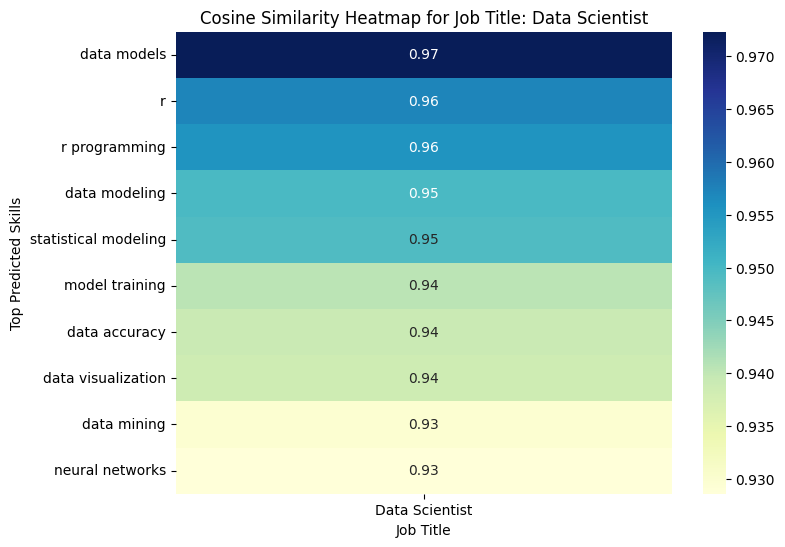

In [81]:
visualize_similarity("Data Scientist", top_n=10, plot_type="heatmap")


FRONTEND DEVELOPER

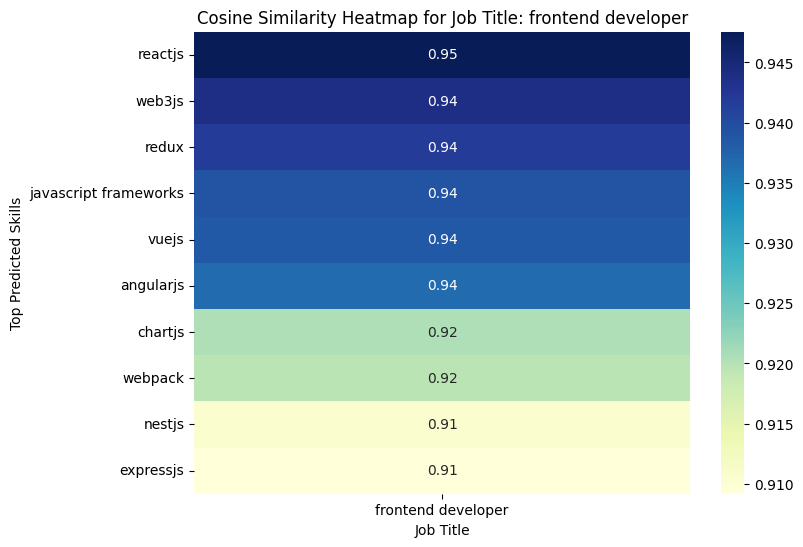

In [82]:
visualize_similarity("frontend developer", top_n=10, plot_type="heatmap")


MARKETING MANAGER

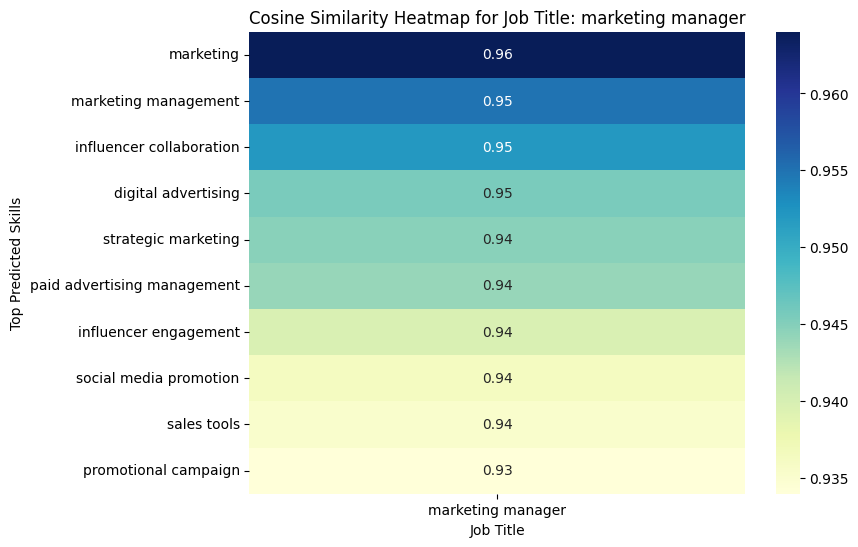

In [84]:
visualize_similarity("marketing manager", top_n=10, plot_type="heatmap")


CONTENT CREATOR

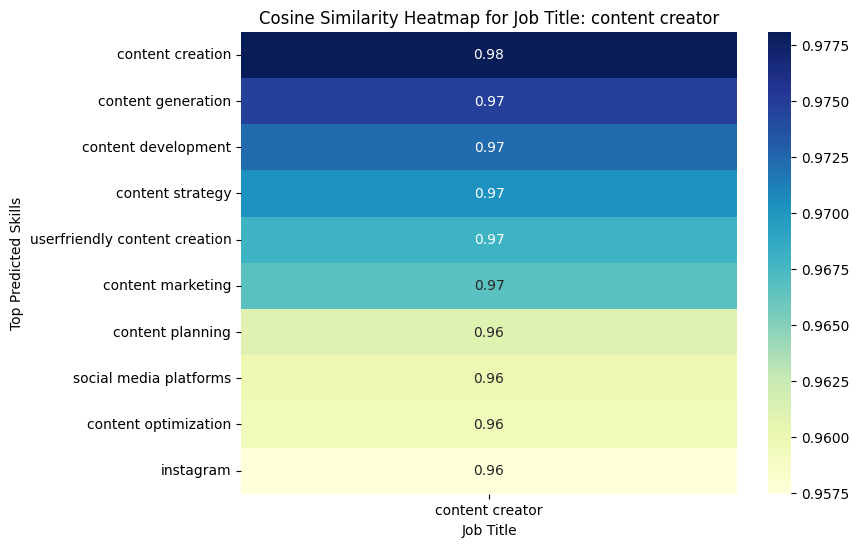

In [85]:
visualize_similarity("content creator", top_n=10, plot_type="heatmap")
